In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
# Create the directory for raw data
!mkdir -p Student_performance_Project/data_raw

# Move your dataset into this folder (assuming it's already saved as raw_frailty_data.csv)
!mv StudentsPerformance.csv Student_performance_Project/data_raw/raw_data.csv


In [3]:
# Create directories for cleaned data and source code
!mkdir -p Student_performance_Project/data_clean
!mkdir -p Student_performance_Project/src

# Create a Python script to clean the data (for example, handling missing values)
!touch Student_performance_Project/src/clean_data.py

In [4]:
# Using the isnull method to identify and count missing values in each column
missing_values_count = df.isnull().sum()

# Displaying Missing Values Count
print("Missing values count in each column:")
print(missing_values_count)

# Checking for overall missing values using the isnull().any().sum() approach
total_missing = df.isnull().any().sum()
if total_missing > 0:
    print(f"There are missing values in {total_missing} columns.")
else:
    print("No missing values in the DataFrame.")


Missing values count in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
No missing values in the DataFrame.


In [5]:

import pandas as pd
import os
# Ensure the directory exists
output_dir = 'Student_performance_Project/data_clean'

# Load the dataset
file_path = 'Student_performance_Project/data_raw/raw_data.csv'
data = pd.read_csv(file_path)

# Step 1: Standardize column names (lowercase and replace spaces with underscores)
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Step 2: Clean specific categorical columns if necessary
# For example, checking for inconsistent values
categorical_columns = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# Step 3: (Optional) Remove duplicates if any exist
data.drop_duplicates(inplace=True)

# Step 4: Ensure data types are appropriate
# Since data types look fine, no changes are necessary here.

# Export the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_students_performance.csv'
data.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed and saved to", cleaned_file_path)

!mv cleaned_students_performance.csv Student_performance_Project/data_clean/cleaned_data.csv

Data cleaning completed and saved to cleaned_students_performance.csv


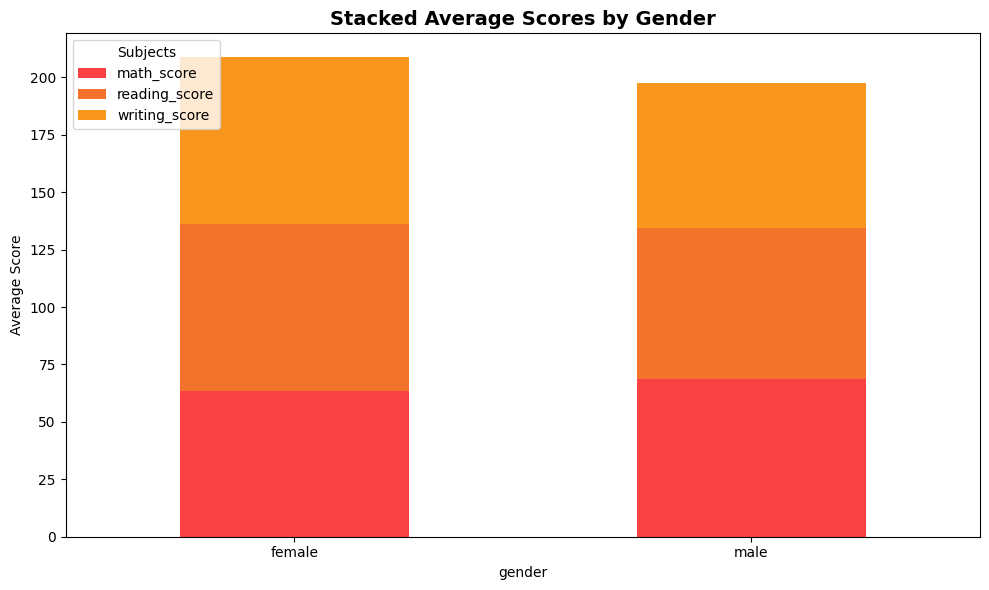

In [6]:
# Calculate average scores by gender
average_scores_by_gender = data.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

# Plot the stacked bar plot
average_scores_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#f94144', '#f3722c', '#f8961e'])
plt.title('Stacked Average Scores by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subjects', loc='upper left')
plt.tight_layout()
plt.show()

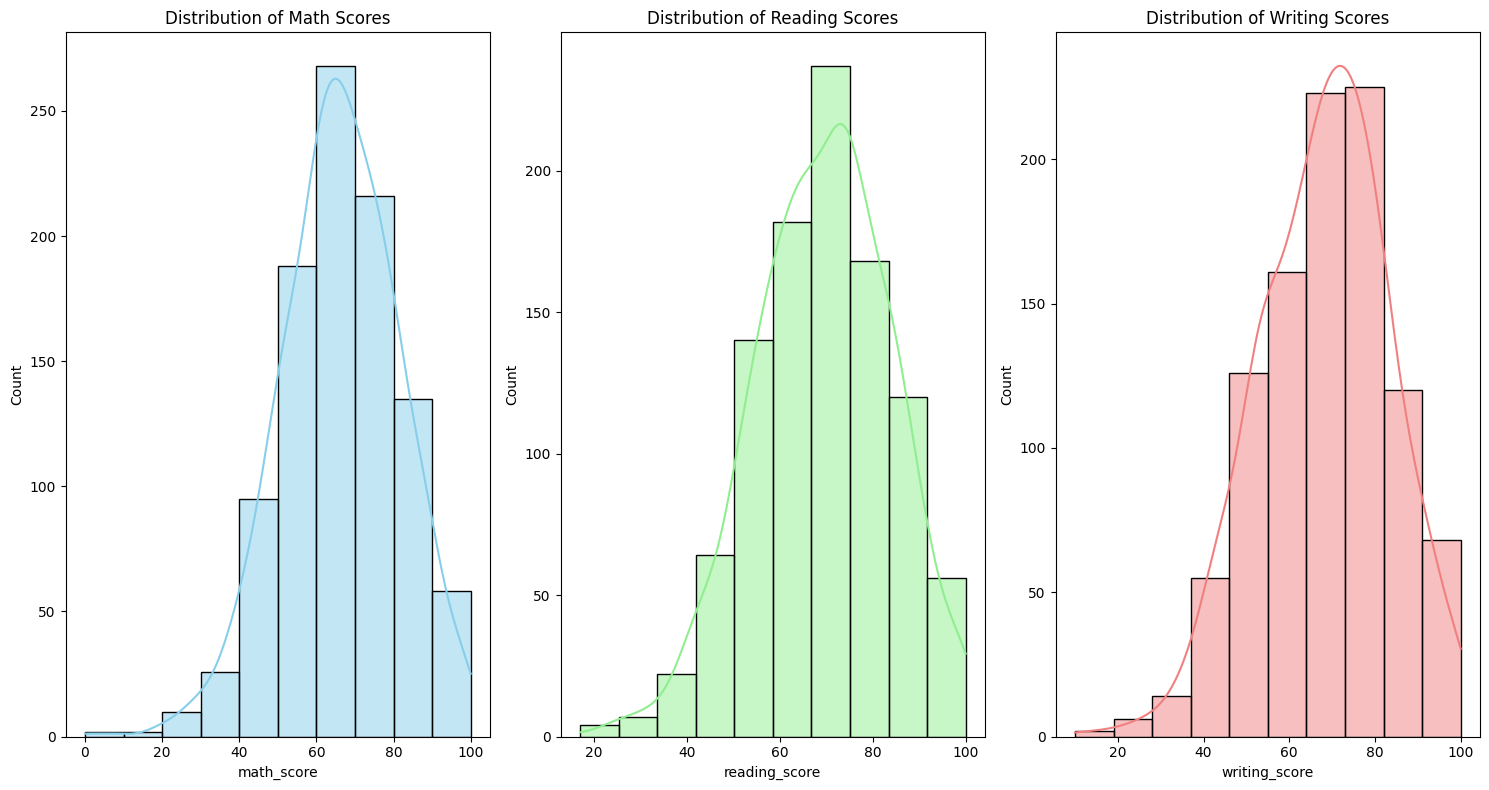

In [7]:
# Create histograms for math, reading, and writing scores
plt.figure(figsize=(15, 8))

# Math score histogram
plt.subplot(1, 3, 1)
sns.histplot(data['math_score'], bins=10, kde=True, color='skyblue') # Changed 'math score' to 'math_score'
plt.title('Distribution of Math Scores')

# Reading score histogram
plt.subplot(1, 3, 2)
sns.histplot(data['reading_score'], bins=10, kde=True, color='lightgreen') # Changed 'reading score' to 'reading_score'
plt.title('Distribution of Reading Scores')

# Writing score histogram
plt.subplot(1, 3, 3)
sns.histplot(data['writing_score'], bins=10, kde=True, color='lightcoral') # Changed 'writing score' to 'writing_score'
plt.title('Distribution of Writing Scores')

plt.tight_layout()
plt.show()

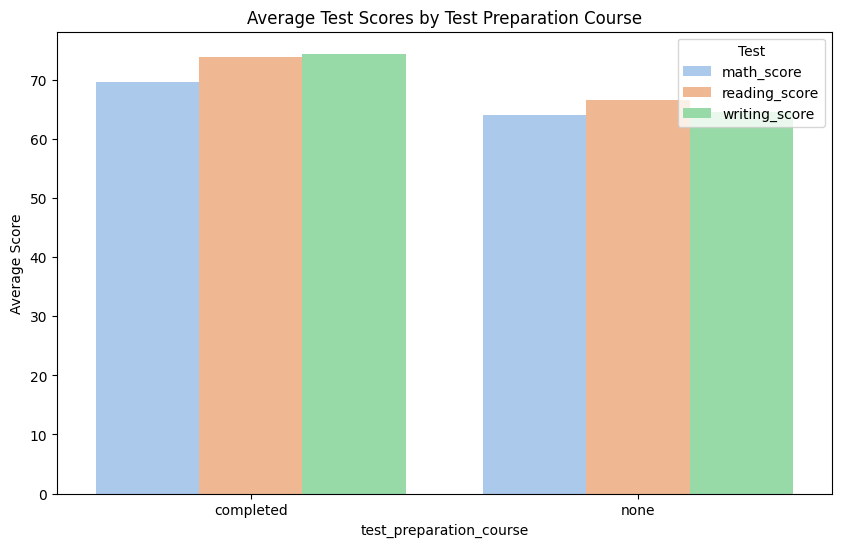

In [8]:
# Calculate average test scores for students who completed and didn't complete the preparation course
avg_scores_by_prep = data.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Melt the data for easier plotting with Seaborn
melted_avg_scores_prep = avg_scores_by_prep.melt(id_vars='test_preparation_course', var_name='Test', value_name='Average Score')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='test_preparation_course', y='Average Score', hue='Test', data=melted_avg_scores_prep, palette='pastel')
plt.title('Average Test Scores by Test Preparation Course')
plt.legend(title='Test')
plt.show()

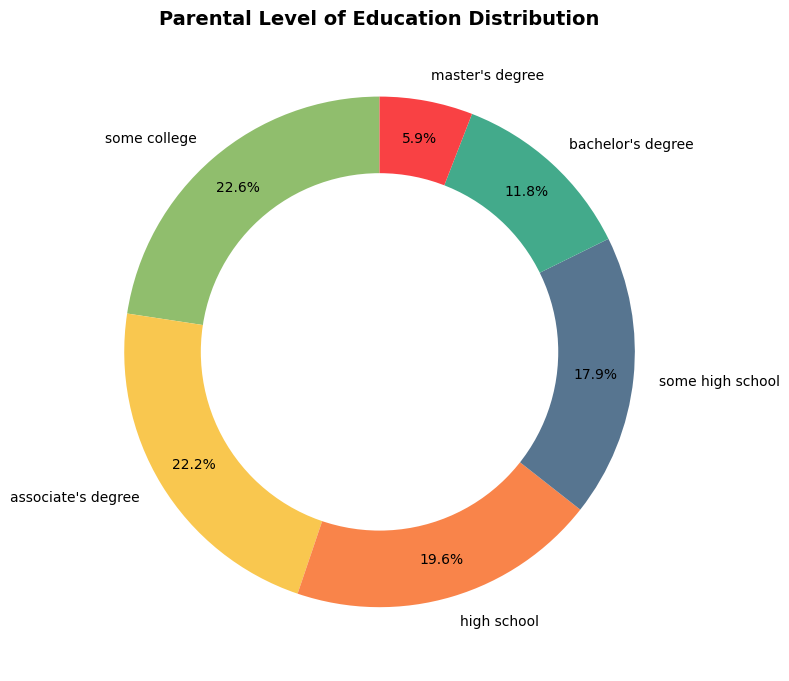

In [9]:
# Get the distribution of parental level of education
parental_education_distribution = data['parental_level_of_education'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(parental_education_distribution, labels=parental_education_distribution.index, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85, colors=['#90be6d', '#f9c74f', '#f9844a', '#577590', '#43aa8b', '#f94144'])
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Parental Level of Education Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

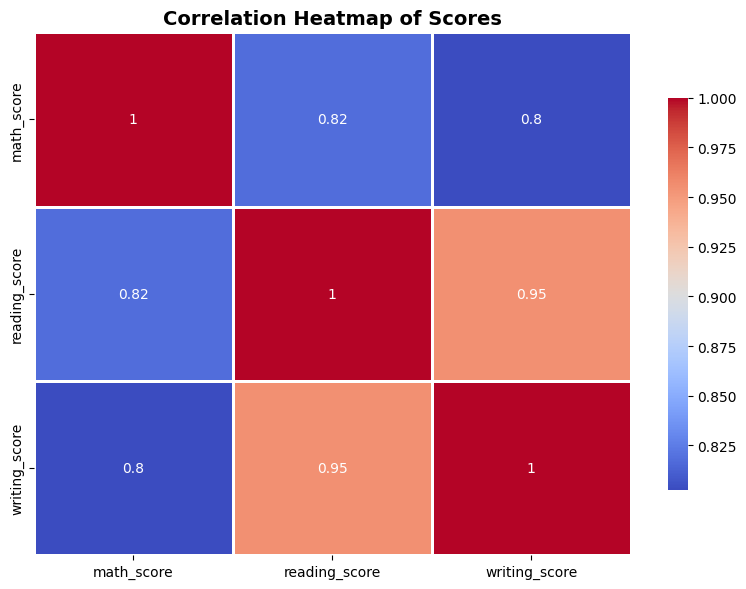

In [10]:

# Select score columns
score_columns = ['math_score', 'reading_score', 'writing_score']

# Compute correlation matrix
corr = data[score_columns].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1, linecolor='white', cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap of Scores', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<ipython-input-11-2e30365c085f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='test_preparation_course', y='math_score', data=data, palette='Spectral', size=6)


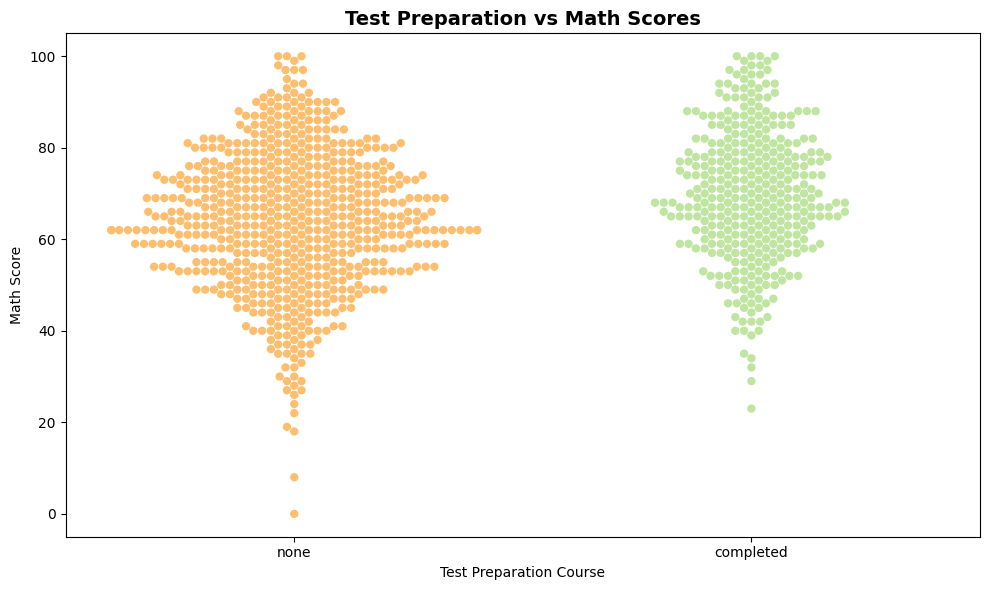

In [11]:
# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='test_preparation_course', y='math_score', data=data, palette='Spectral', size=6)
plt.title('Test Preparation vs Math Scores', fontsize=14, fontweight='bold')
plt.ylabel('Math Score')
plt.xlabel('Test Preparation Course')
plt.tight_layout()
plt.show()

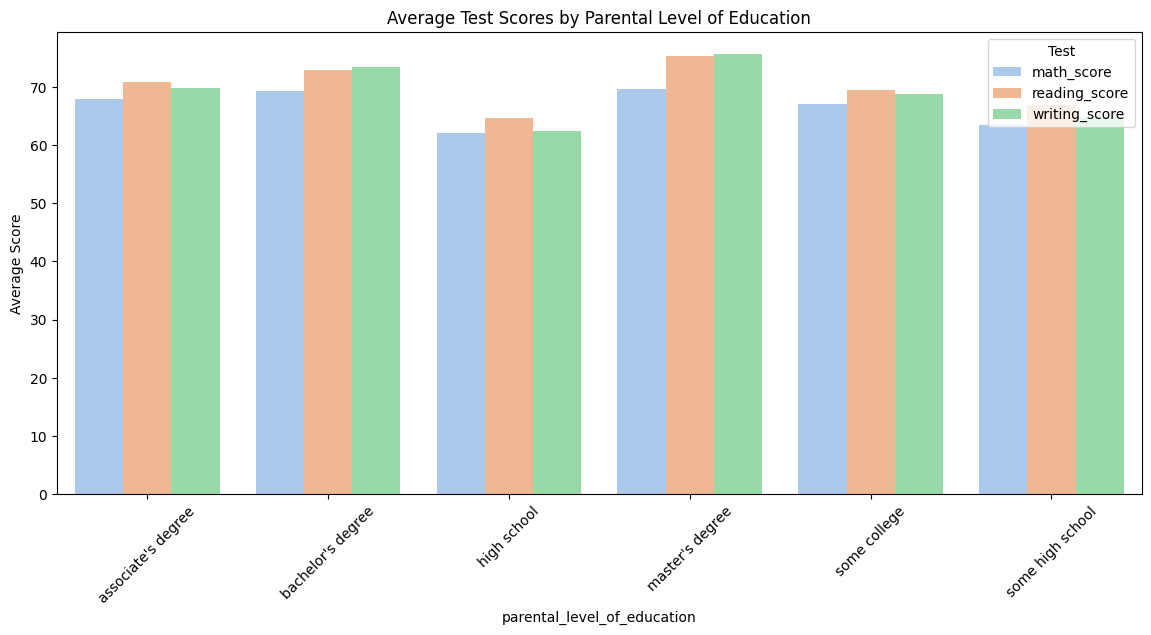

In [12]:
# Calculate the average scores for each parental level of education
avg_scores_by_parent_edu = data.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Melt the data for easier plotting with Seaborn
melted_avg_scores = avg_scores_by_parent_edu.melt(id_vars='parental_level_of_education', var_name='Test', value_name='Average Score')

# Plot the grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='parental_level_of_education', y='Average Score', hue='Test', data=melted_avg_scores, palette='pastel')
plt.title('Average Test Scores by Parental Level of Education')
plt.xticks(rotation=45)
plt.legend(title='Test')
plt.show()